In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/My Drive/Python Collabs/Time Series

/content/drive/My Drive/Python Collabs/Time Series


**Importing Labraries**

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import datetime

**Load Data**

In [4]:
series=pd.read_csv('AirPassengers.csv',header=0,parse_dates=[0],index_col=0)

In [5]:
series.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
series.rename(columns={'#Passengers':'Passengers'},inplace=True)
#series.rename(columns={'Month':'Date'},inplace=True)
series.insert(0,"Year", " ")
series.insert(1,"Month", " ")
series.index.name='DATE'

In [7]:
for i in range(0,len(series)):
    x=series.index[i]
    series['Year'][i]=x.year
    series['Month'][i]=x.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
series.head()

,Year,Month,Passengers
DATE,,,
1949-01-01,1949,1,112
1949-02-01,1949,2,118
1949-03-01,1949,3,132
1949-04-01,1949,4,129
1949-05-01,1949,5,121


In [9]:
#series.index.name='DATE'

In [10]:
series.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        144 non-null    object
 1   Month       144 non-null    object
 2   Passengers  144 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.5+ KB


the data is clean it has not a missed values

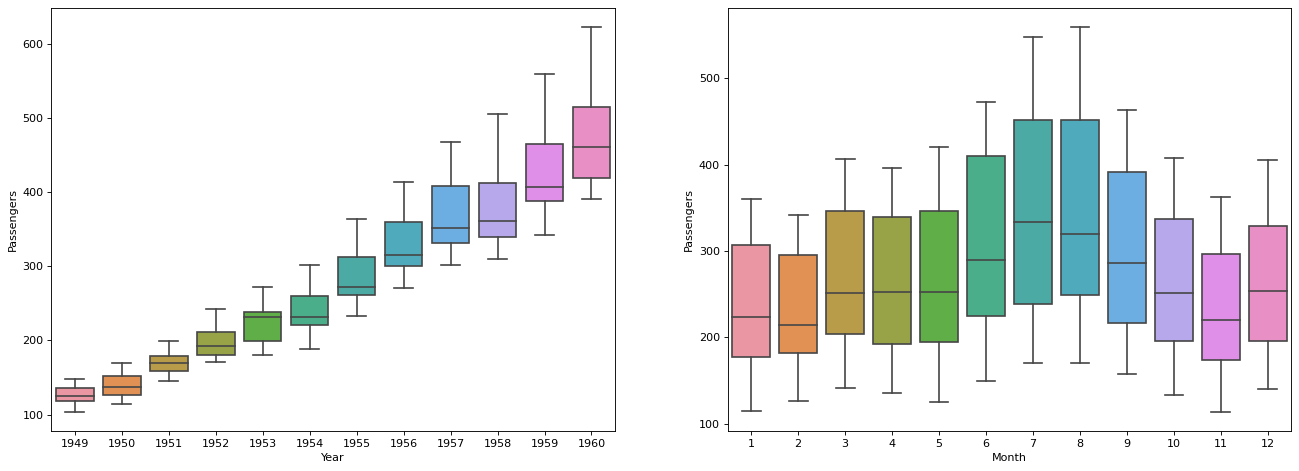

In [23]:
fig,axes=plt.subplots(1,2,figsize=(20,7),dpi=80)
sns.boxplot(x='Year',y='Passengers',data=series, ax=axes[0])
sns.boxplot(x='Month',y='Passengers',data=series.loc[~series.Year.isin([1949,1960]),:])

The boxplots of year evolution shows a trend and no outliers spotted
In the Month based boxplot there are also no outliers and a peaks at july and August

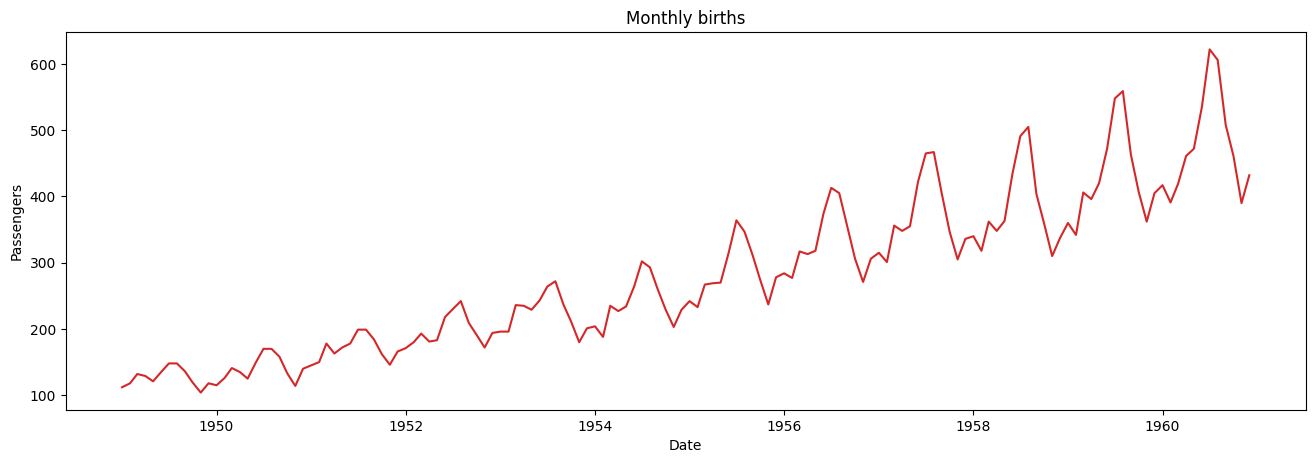

In [12]:
import matplotlib.pyplot as plt
def plot_timeseries(df, x, y, title="", xlabel='Date', ylabel='Passengers', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_timeseries(series, x=series.index, y=series.Passengers, title='Monthly births')

The pattern of the plotted time series shows a trend + seasonality